In [1]:
import sys
sys.path.append('/home/sapje1/code/python_mrobjects/qc')
import mriqc
import os
import numpy as np
import matplotlib.pyplot as plt
nii_path = 'C:\\Users\\sapje1\\data\\RoutineQA_examples'
nii_file1 = '20211111_113225WarmingUps002a001.nii'
nii_file2 = '20211111_113225GloverGSQAPs003a001.nii'

In [2]:
first_run = mriqc.FmriQc(nii_path,nii_file1,in_vivo=False)

In [3]:
mid_voi=first_run.voi((10,20,20))

In [4]:
first_run.calc_sfnr(mask=mid_voi)

556.7171634425938 1492.6812733333331 2.779931380972772


(556.7171634425938, 1492.6812733333331, 2.779931380972772)

C:\Users\sapje1\code\python_mrdatamethods\qc\mriqc.py:95: RuntimeWarning: Mean of empty slice
  sig_timeseries = np.nanmean(np.nanmean(np.nanmean(masked_data, axis=3), axis=2), axis=1)


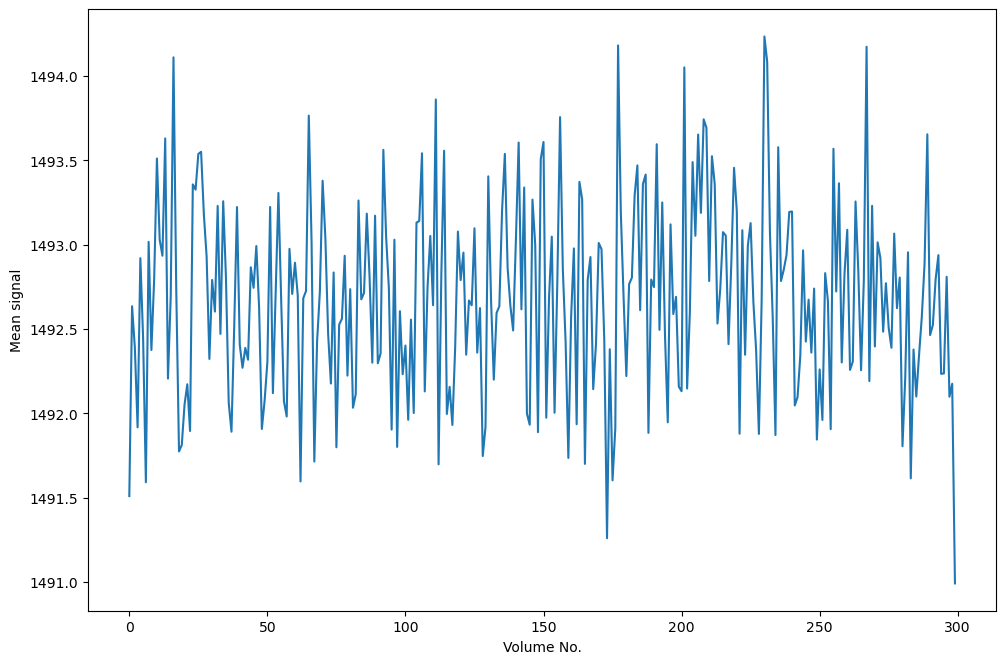

In [5]:
s1=first_run.timeseries(mask=mid_voi,plot=True)

In [6]:
np.std(s1)

0.5701280187720075

In [7]:
first_run.vol_data.shape

(300, 27, 64, 64)

[13, 32, 32]

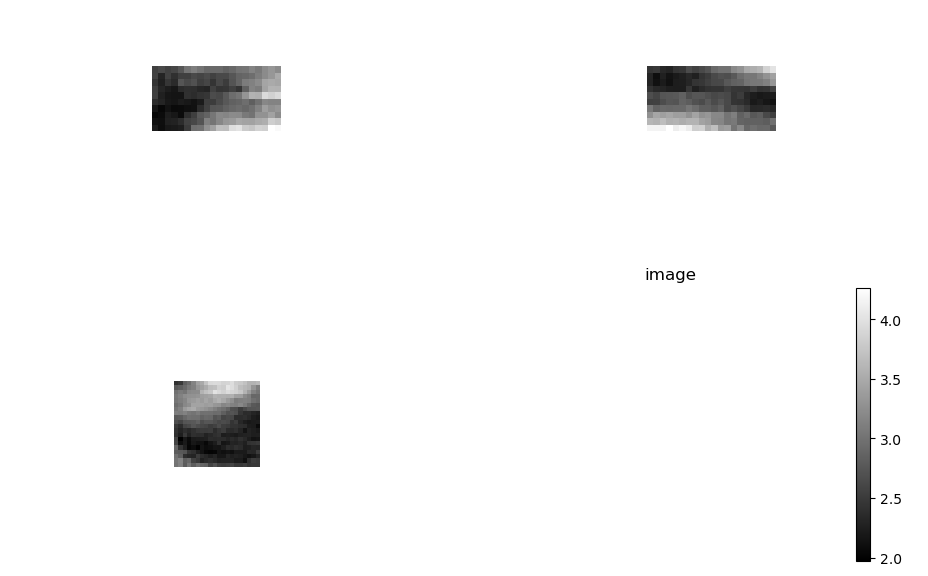

In [8]:
mriqc.ortho_view(first_run.vol_stdev)

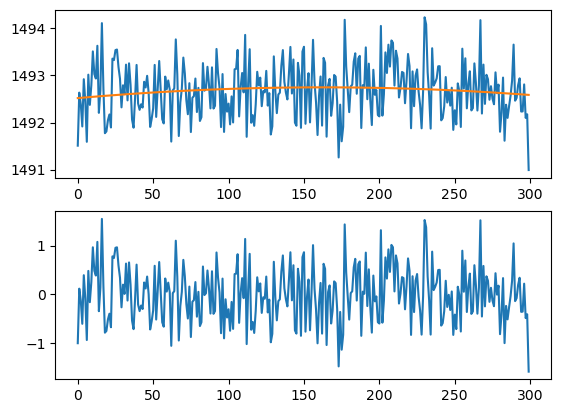

In [9]:
dr=first_run.drift_correct(correct=True,mask=mid_voi,plot=True)

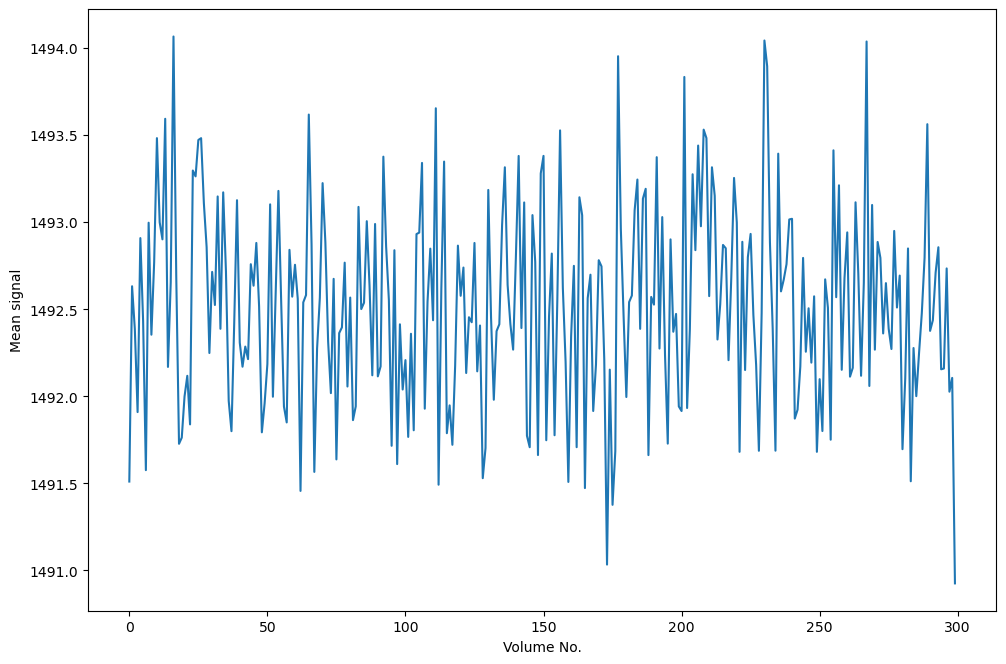

In [10]:
s2=first_run.timeseries(mask=mid_voi, plot=True)

In [11]:
np.std(s2)

0.5668399597812521

In [12]:
first_run.basic_stats()
first_run.calc_sfnr(mask=mid_voi)

557.1236032064285 1492.5191571923608 2.778786343062997


(557.1236032064285, 1492.5191571923608, 2.778786343062997)

[13, 32, 32]

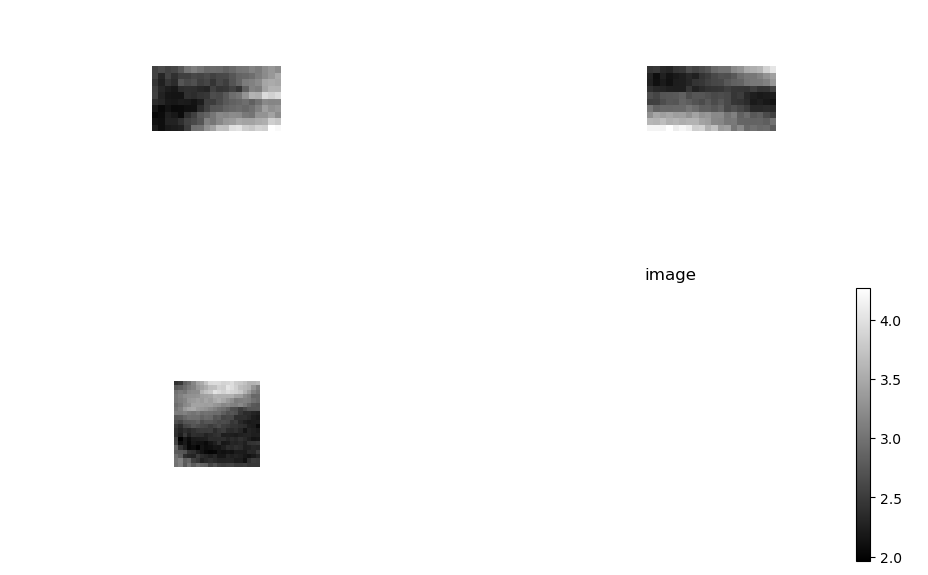

In [13]:
mriqc.ortho_view(first_run.vol_stdev)

In [14]:
def calc_sfnr_by_vol(fmriqc_data, mask=False):
    nvols = fmriqc_data.shape[0]
    sfnr_by_vol = []
    vol = []
    mean_by_vol = []
    stdev_by_vol = []
    sf,mn,st = fmriqc_data.calc_sfnr(mask=mask)
    sfnr_by_vol.append(sf)
    mean_by_vol.append(mn)
    stdev_by_vol.append(st)
    vol.append(nvols)
    for vv in range(nvols,5,-1):
        # this is destructive - would need to reload data to get the full dataset back
        fmriqc_data.vol_data=fmriqc_data.vol_data[0:vv,:,:,:]
        [sf,mn,st] = fmriqc_data.calc_sfnr(mask=mask)
        sfnr_by_vol.append(sf)
        mean_by_vol.append(mn)
        stdev_by_vol.append(st)
        vol.append(vv)
    return(vol, sfnr_by_vol, mean_by_vol, stdev_by_vol)

In [15]:
[v,sfnr,mn,std]=calc_sfnr_by_vol(first_run,mask=mid_voi)

557.1236032064285 1492.5191571923608 2.778786343062997
557.1236032064285 1492.5191571923608 2.778786343062997
557.4157558267037 1492.5244910032354 2.7771921318628654
557.6500965249402 1492.5258986812141 2.7760733961103923
557.4932552259846 1492.527582092763 2.7767709951894775
557.4646440169893 1492.5268843457868 2.7765421838131403
557.5564596852289 1492.5281311666024 2.7760764955388026
557.5707010062085 1492.5294018628379 2.776406100070114
557.6169066702977 1492.5282879169688 2.7765970689216046
557.7495032280457 1492.52766631123 2.775847228253373
557.4488906186085 1492.527978488095 2.7773661041095337
557.2729763463882 1492.5285047375176 2.778338738252638
557.3705583574238 1492.5249254226708 2.7779607567305606
557.6471795833141 1492.5239867798261 2.7760836506402664
557.4859667275161 1492.5241492785137 2.7765367674327446
557.1341778063228 1492.5251140941318 2.778467850737721
557.0863923879806 1492.5269562782225 2.778607816341598
557.2364765081425 1492.5278373267183 2.7778437916240857
557

560.2319441080733 1492.5071355932293 2.7807086271730896
560.6599160153683 1492.5013111982769 2.779969436674935
560.4434956254006 1492.4960832738761 2.7820089548777367
560.0543483481556 1492.501720550776 2.783261966547455
560.2095014149623 1492.4998851265473 2.7815815887312465
560.0486243796967 1492.496181895956 2.782485344445914
560.1927948062371 1492.501625543967 2.782339366722846
560.4881930181297 1492.5066877606846 2.7809869790990005
560.343841054997 1492.502446087683 2.780601867801412
560.967275526203 1492.503226729681 2.7784894673821654
561.1155910002648 1492.4970052163526 2.7781994731377977
562.0259103046437 1492.4948278067918 2.7748077020158775
561.9802081445412 1492.4964633143106 2.7755416327290785
561.796659689877 1492.4970579091291 2.7774569184588715
561.8077639186904 1492.4960156788457 2.7769269491238884
561.5425161780316 1492.489991566577 2.7781664587132426
561.9694064053165 1492.4863321433827 2.7758926041354477
561.7948863287721 1492.4868775346838 2.7773604348589918
562.20

Text(0, 0.5, 'Estimated SFNR')

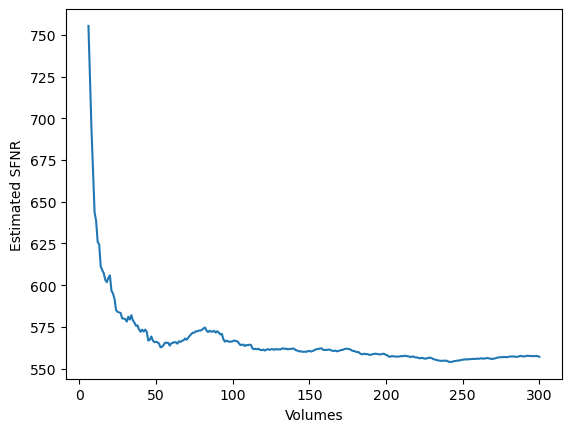

In [16]:
fig=plt.figure()
ax=fig.subplots()
ax.plot(v,sfnr)
ax.set_xlabel('Volumes')
ax.set_ylabel('Estimated SFNR')

Text(0, 0.5, 'std')

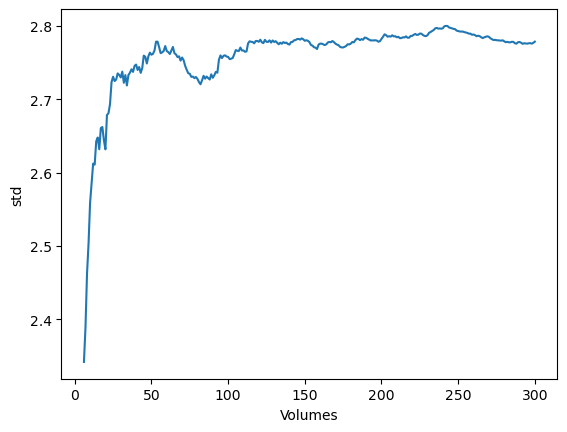

In [17]:
fig=plt.figure()
ax=fig.subplots()
ax.plot(v,std)
ax.set_xlabel('Volumes')
ax.set_ylabel('std')

In [27]:
second_run=mriqc.FmriQc(nii_path,nii_file2,in_vivo=False)

In [28]:
second_run.vol_data.shape

(57, 27, 64, 64)

In [29]:
nvols = second_run.vol_data.shape[0]

In [30]:
sfnr_by_vol2 = []
sf,sg,no=second_run.calc_sfnr(mask=mid_voi)
sfnr_by_vol2.append(sf)
vol2 = []
vol2.append(nvols)

582.4286040353869 1492.4334342105265 2.6562161796719845


In [31]:
for vv in range(nvols,5,-1):
    second_run.vol_data=second_run.vol_data[0:vv,:,:,:]
    sf,sg,no = second_run.calc_sfnr(mask=mid_voi)
    sfnr_by_vol2.append(sf)
    vol2.append(vv)

582.4286040353869 1492.4334342105265 2.6562161796719845
584.3357864929745 1492.4577901785713 2.647277668925808
582.5136527425843 1492.4516772727272 2.6541973291110796
584.894466721384 1492.4500416666665 2.6489820014301833
585.9481869158749 1492.4702122641513 2.642832677756836
586.6787627733014 1492.4823461538463 2.6398355306701533
586.2848769757924 1492.4618039215686 2.641970325641537
587.2082247640552 1492.479905 2.641272958594608
585.6685874672601 1492.4818826530613 2.649657491739275
586.1298874720737 1492.4938906250002 2.6509884705019386
586.5863229703886 1492.5113670212766 2.649619929808618
586.3367149446291 1492.5278804347827 2.6508286660850064
588.1669573868564 1492.519138888889 2.6447440668214686
587.8104593030031 1492.5420284090908 2.6464492541955
587.9294859670193 1492.5347790697674 2.6444780807282706
587.5170812475461 1492.5640952380954 2.6469104240265806
585.7322896855734 1492.5623353658536 2.6559730895402964
585.371457120631 1492.56356875 2.655525515218012
585.5587718925683

Text(0, 0.5, 'Estimated SFNR (Glover, second run)')

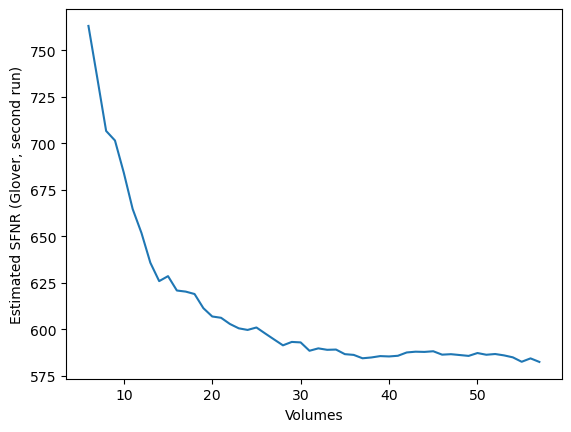

In [32]:
fig3=plt.figure()
ax3=fig3.subplots()
ax3.plot(vol2,sfnr_by_vol2)
ax3.set_xlabel('Volumes')
ax3.set_ylabel('Estimated SFNR (Glover, second run)')